In [1]:
# %reset

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
from ultralytics import YOLO
from utils.tools import *
import argparse
import ast
import gradio as gr
import torch
from utils.tools import fast_process, point_prompt, text_prompt, box_prompt
from PIL import ImageDraw
import numpy as np
import cv2

In [7]:
parser = argparse.ArgumentParser()

parser.add_argument("--model_path", type=str, default="models/FastSAM.pt", help="model")

parser.add_argument("--img_path", type=str, default="./images/dogs.jpg", help="path to image file")

parser.add_argument("--text_prompt", type=str, default="dog", help='use text prompt eg: "a dog"')

parser.add_argument("--imgsz", type=int, default=1024, help="image size")

parser.add_argument("--iou",type=float,default=0.9,help="iou threshold for filtering the annotations")

parser.add_argument("--conf", type=float, default=0.4, help="object confidence threshold")

parser.add_argument("--output", type=str, default="./output/", help="image save path")

parser.add_argument("--randomcolor", type=bool, default=True, help="mask random color")

parser.add_argument("--point_prompt", type=str, default="[[0,0]]", help="[[x1,y1],[x2,y2]]")

parser.add_argument("--point_label",type=str,default="[0]",help="[1,0] 0:background, 1:foreground")

parser.add_argument("--box_prompt", type=str, default="[0,0,0,0]", help="[x,y,w,h]")

parser.add_argument("--better_quality",type=str,default=False,help="better quality using morphologyEx")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

parser.add_argument("--device", type=str, default=device, help="cuda:[0,1,2,3,4] or cpu")

parser.add_argument("--retina",type=bool,default=True,help="draw high-resolution segmentation masks")

parser.add_argument("--withContours", type=bool, default=False, help="draw the edges of the masks")

args, unknow = parser.parse_known_args()

In [8]:
args

Namespace(better_quality=False, box_prompt='[0,0,0,0]', conf=0.4, device=device(type='cpu'), img_path='./images/dogs.jpg', imgsz=1024, iou=0.9, model_path='models/FastSAM.pt', output='./output/', point_label='[0]', point_prompt='[[0,0]]', randomcolor=True, retina=True, text_prompt='dog', withContours=False)

In [9]:
model = YOLO(args.model_path)
results = model(args.img_path,imgsz=args.imgsz,device=args.device,
                retina_masks=args.retina,iou=args.iou,conf=args.conf,max_det=300)


image 1/1 C:\Users\TarunKumarChaubey\Documents\FastSAM\images\dogs.jpg: 576x1024 21 objects, 6283.3ms
Speed: 23.7ms preprocess, 6283.3ms inference, 252.7ms postprocess per image at shape (1, 3, 1024, 1024)


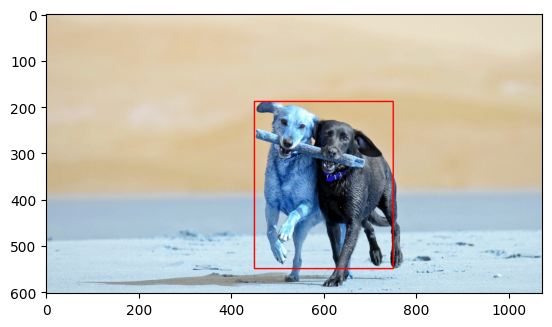

In [10]:
img = cv2.imread(args.img_path,cv2.COLOR_BGR2RGB)
# img = cv2.rectangle(img, (350, 800), (540, 1030), (255,0,0), 2)
img = cv2.rectangle(img, (450, 190), (750, 550), (255,0,0), 2) #dog images
plt.imshow(img)

#### box_prompt

In [ ]:
ori_img = cv2.imread(args.img_path)
ori_h = ori_img.shape[0]
ori_w = ori_img.shape[1]
mask, idx = box_prompt(results[0].masks.data,convert_box_xywh_to_xyxy([350,800,540,1030]),ori_h,ori_w)  # [400,200,450,500] - dog
annotations = np.array([mask])
fast_process(annotations=annotations,args=args,mask_random_color=args.randomcolor)

#### text_prompt

In [51]:
def MultiProcessing(func):
     # creating new process
    p1 = multiprocessing.Process(target=func)
    # starting process
    p1.start()
    # wait until process is finished
    p1.join()

In [23]:
args.imgsz

1024

In [24]:
args.retina

True

In [37]:
args.iou = 0.50
args.iou

0.5

In [ ]:
args.conf

In [56]:
args.text_prompt = ""
args.img_path = "./images/Bird.jpeg"

In [ ]:
%%time
results = model(args.img_path,imgsz=args.imgsz,device=args.device,
        retina_masks=args.retina,iou=args.iou,conf=args.conf,max_det=300)

formated_res = format_results(results[0], 0)
mask, idx = text_prompt(formated_res,args.text_prompt,args.img_path,args.device)
annotations = np.array([mask])
fast_process(annotations=annotations,args=args,mask_random_color=args.randomcolor)

In [90]:
# args.text_prompt = "show me iron Rust Distressed Junk Corrosion in the image"
args.text_prompt = "rods"
args.img_path = "./images/DSC_6204.JPG"

In [91]:
%matplotlib inline

In [ ]:
%%time
def Predict():
    results = model(args.img_path,imgsz=args.imgsz,device=args.device,
            retina_masks=args.retina,iou=args.iou,conf=args.conf,max_det=300)

    formated_res = format_results(results[0], 0)
    mask, idx = text_prompt(formated_res,args.text_prompt,args.img_path,args.device)
    annotations = np.array([mask])
    fast_process(annotations=annotations,args=args,mask_random_color=args.randomcolor)

from multiprocessing import Process

p1 = Process(target=Predict())
# starting process
p1.start()
p1.join()

In [96]:
results[0].masks.xy[0]

array([[        168,         133],
       [        168,         134],
       [        166,         136],
       [        166,         142],
       [        167,         142],
       [        168,         143],
       [        168,         144],
       [        169,         144],
       [        171,         146],
       [        180,         146],
       [        182,         144],
       [        182,         137],
       [        179,         134],
       [        179,         133]], dtype=float32)

#### point_prompt

In [ ]:
ori_img = cv2.imread(args.img_path)
ori_h = ori_img.shape[0]
ori_w = ori_img.shape[1]
formated_res = format_results(results[0], 0)
mask, idx = point_prompt(formated_res,[[1080,660]],args.point_label,ori_h,ori_w)
# mask, idx = point_prompt(formated_res,args.point_prompt,args.point_label,ori_h,ori_w)
annotations = np.array([mask])
fast_process(annotations=annotations,args=args,mask_random_color=args.randomcolor)